In [34]:
%run ../../init_python.py

In [4]:
df_exc = pd.read_hdf('data/exchanges.h5', key='data')

In [5]:
df_exc.head()

,conversation_id,exchange_id,created_at,creator_id,guest_user_id,host_user_id,finalized_at,canceled_at,start_on,end_on,...,user_cancellation_id,exchange_type,home_type,residence_type,capacity,country,region,department,city,k
0,46206392,68934690,2022-07-16,3621147,3621147,4033514,NaT,NaT,2022-08-01,2022-08-02,...,NaN,NON_RECIPROCAL,apartment,primary,4.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1
1,47838047,70678856,2022-10-25,2595152,2595152,3980440,NaT,NaT,None,None,...,NaN,NON_RECIPROCAL,Home,primary,6.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1
2,46453678,69197483,2022-08-01,689341,689341,4027070,NaT,NaT,2022-08-11,2022-08-15,...,NaN,NON_RECIPROCAL,Home,primary,10.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1
3,41439268,63540384,2021-09-06,3528079,3528079,337677,NaT,NaT,2021-12-26,2022-01-02,...,NaN,NON_RECIPROCAL,apartment,secondary,9.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1
4,42477400,64699420,2021-12-19,3749583,3749583,336788,NaT,NaT,2021-12-26,2021-12-30,...,NaN,NON_RECIPROCAL,apartment,secondary,6.0,FRA,Provence-Alpes-Côte D'azur,Alpes-Maritimes,Nice,1


In [6]:
df_subs = pd.read_hdf('data/subscription.h5', key='data')


In [7]:
df_subs.head()

,pk,subscription_date,user_id,renew,first_subscription_date,first_subscription,referral,promotion,payment3x,payment2,payment3,country,region,department,city,k
0,2020-08-12_1496977,2020-08-12,1496977,1,2012-06-08,0,0,0,0,0,0,HUN,None,None,Balatongyörök,1
1,2021-02-15_635998,2021-02-15,635998,1,2019-02-15,0,0,0,0,0,0,MLT,None,None,Birkirkara,1
2,2020-08-25_2024409,2020-08-25,2024409,1,2013-08-13,0,0,0,0,0,0,DNK,None,None,København,1
3,2021-09-16_2458052,2021-09-16,2458052,1,2015-03-11,0,0,0,0,0,0,ISL,None,None,Kópavogur,1
4,2020-05-23_574875,2020-05-23,574875,1,2019-05-23,0,0,0,0,0,0,FRA,None,None,Nice,1


In [8]:
df_subs['first_subscription_date']= pd.to_datetime(df_subs['first_subscription_date'])
df_subs['subscription_date']= pd.to_datetime(df_subs['subscription_date'])


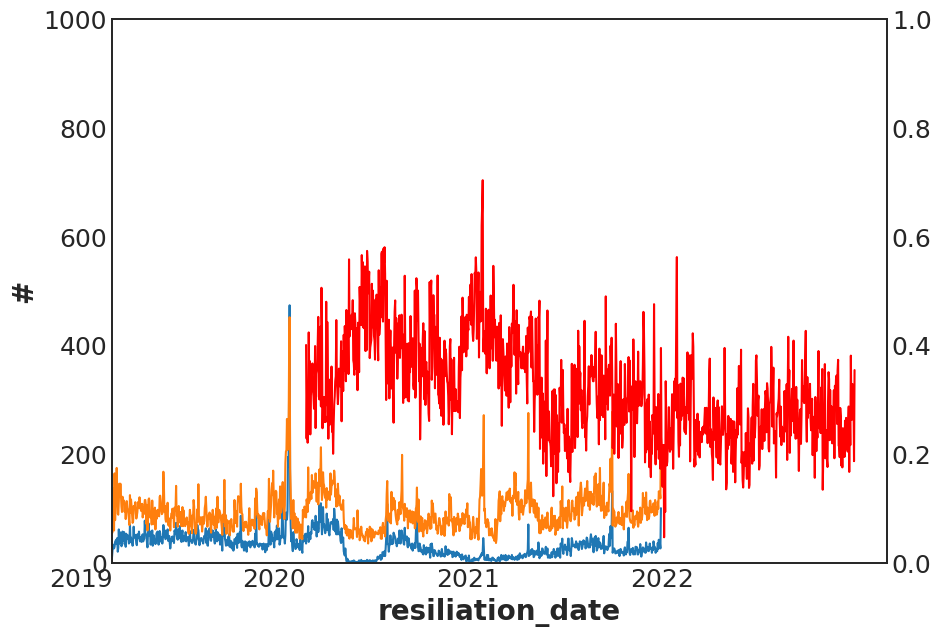

In [38]:


first_inscription =  df_subs.groupby('first_subscription_date')['user_id'].aggregate('nunique')
first_inscription.plot(label='FIRST inscription')

inscription =  df_subs.groupby('subscription_date')['user_id'].aggregate('nunique')
inscription.plot(label='inscription')
plt.xlabel('date')

plt.ylabel('#')
plt.ylim(0,1000)

df_subs_here = df_subs.copy()

df_subs_here['resiliation_date']=df_subs_here['subscription_date'] + np.timedelta64(365,'D')

resiliation =  1-df_subs_here.groupby('resiliation_date')['renew'].aggregate('mean')
resiliation.plot(label ='# churner', color= 'red',  secondary_y=True)
plt.xlabel('date')



plt.xlim(np.datetime64('2018-12-31'), np.datetime64('2022-12-31'))
plt.ylim(0,1)

plt.show()

#plt.xlim(np.datetime64('2018-12-31'), np.datetime64('2022-12-31'))
